In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

# Getting serious about missing values
So far, we've covered the basics of data preparation and how the way we deal with missing values can affect results. Let's work through some scenerios that can occur in practice. 

Alas, sometimes you just can't get away with ignoring missing values. The most common situation is when you're comparing two time series. There are several "aesthetics" for dealing with missing values, some of which we've studied and others of which we haven't. *Imputation* is a fancy word for computing reasonable replacements for missing values. 

In this exercise, I am going to give you the data analysis code and you will create data for which that code is not suitable, and explain why. Think of this as "Jeopardy for data". 

Hint: to type a NaN into a list, use `np.nan`. E.g., `[ 1, 2, 3, np.nan, 4 ]`

To help you with thinking, I took the liberty of visualizing your results. 

For an overview, see https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [2]:
# Run this first to load all libraries. 
import numpy as np
import pandas as pd

<!-- BEGIN QUESTION -->

*Question 1:* In the code cell below, define a Series with a column x having missing values, for which linear interpolation adversely affects the accuracy of data analysis. Then describe how the interpolation method changes results in the text cell below. 

_Type your answer here, replacing this text._

<AxesSubplot:>

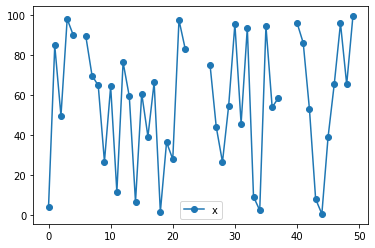

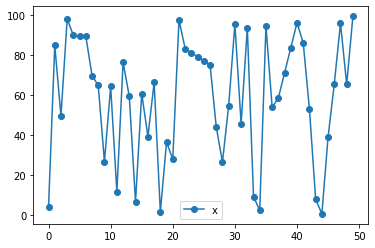

In [3]:
# first define a column x with some missing (NaN) values. 
x = np.random.uniform(0.0, 100, 50)
x[5] = np.nan
x[23] = np.nan
x[24] = np.nan
x[25] = np.nan
x[38] = np.nan
x[39] = np.nan
x = pd.Series(x)
# then I will create a DataFrame with these series and interpolate. 
# I will use an artificial time stamp for simplicity, and assume equal time intervals. 
ex1 = x.to_frame(name='x')
im1 = ex1.copy()
im1['x'] = im1['x'].interpolate(method='linear', limit_direction='forward', axis=0)
import matplotlib as mpl 
ex1.plot(style='o-')
im1.plot(style='o-')

In [4]:
#How does this change results?
#In the first model, they disregarded the missing values so we can see that the lines are not connected at where the 
#nan values are suppose to be at.
#what the interplation method does is that for a nan value z, they take the previous data point and the next data
#point after z and connect them together, and make z the data point equidistant to the 2 data (middle of the created
# line). If there's a continuous nan value a,b,c, they do the same thing and make the values a,b,c equidistant in the 
#line created such that the distance of the line is divided into 4.
#problem with this is that it causes part of the graphs to look linear and not random.

In [5]:
grader.check("q1")

q1 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* For your example from Question 1, describe a method for dealing with NaNs that doesn't suffer from the weakness you pointed out in question 1. Give code for this method in the code cell below below. 

_Type your answer here, replacing this text._

<AxesSubplot:>

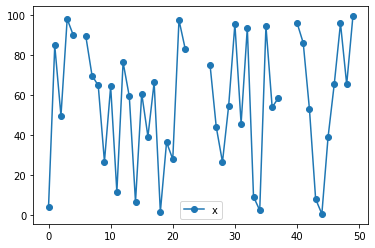

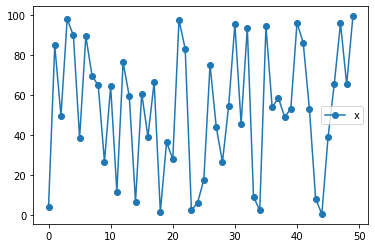

In [6]:
im1 = ex1.copy()
# Use some strategy to eliminate NaNs from im1 here. 
for i in range(len(im1)):
    if np.isnan(im1.x[i]):
        im1.x[i] = np.random.uniform(0,100)
#im1 = im1.replace(np.nan, np.random.uniform(0,100))
#im1 = [np.random.uniform(0,100) if i==np.nan for i in im1]
# Then let's look at the results.  
ex1.plot(style='o-')
im1.plot(style='o-')

In [7]:
# How does this address the problem?
#since we know that the other data points were generated using a random uniform generator such that the probability
# of getting any number between 0 and 100 is equal, we can do the same for the missing values and assign them using
# the same generator. 

In [8]:
grader.check("q2")

q2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 3:*  When dealing with categorical data, e.g., an integer from 1 to 5, it's sometimes considered wise to replace the missing values with the most frequent value: the so-called *mode* of the data. Give an example of how doing this can seriously compromise the accuracy of a poll. Explain why in the text box below. 

FYI: it is considered good practice to allow anyone to refuse to answer any question of a poll and simply leave it blank. That is how this situation might arise. 

_Type your answer here, replacing this text._

mode = 5.0


<AxesSubplot:ylabel='Frequency'>

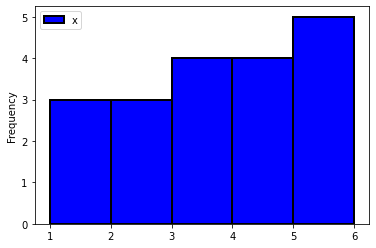

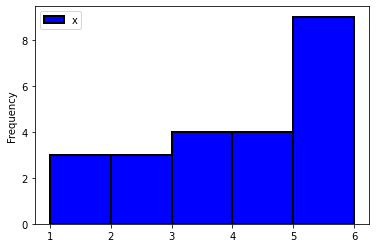

In [9]:
# Define some results for categorical data values 1-5, in a Series c. 
c = pd.Series([1,2,4,3,np.nan,3,5,np.nan,4,5,2,5,1,np.nan,3,4,5,2,np.nan,1,4,3,5])
# Now I'll compute the mode and fill in NaNs with data. 
ex2 = c.to_frame(name='x')
im2 = ex2.copy()
mode = im2['x'].mode()[0]  # pick first one if there's more than one 
print("mode = {}".format(mode))
im2 = im2.fillna(mode)
# Now I'll plot the results as two plots. 
ex2.plot.hist(bins=range(1,7), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis
im2.plot.hist(bins=range(1,7), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis

In [10]:
grader.check("q3")

q3 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 4:* For the example you gave in question 3, what strategy for NaNs would eliminate the problem? Explain why in the cell below, then implement your solution in the next cell. 

we can create a new category '6' which keep tracks of the frequency of missing data values. That way, the frequencies with known values will not be affected in any way but we would be able to know how many people did not answer the poll.

<AxesSubplot:ylabel='Frequency'>

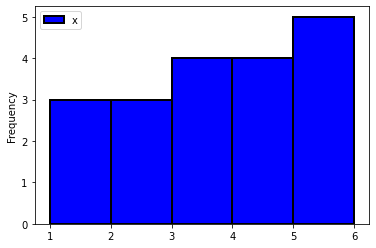

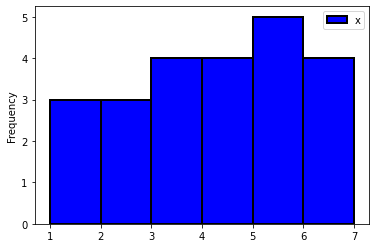

In [11]:
im2 = ex2.copy()
im2 = im2.fillna(6)
# Now I'll plot the results as two plots. 
ex2.plot.hist(bins=range(1,7), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis
im2.plot.hist(bins=range(1,8), facecolor='b', edgecolor='k', linewidth=2)  # Ticks are 1-6 on x axis
# Why does this work? 

In [12]:
grader.check("q4")

q4 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 5:* Give a real-life example in which backfilling is the best way to handle NaN. 

in cases of dealing with historical price data, such as retail stores. When items are not in stock, there's no price for the items at that time, so there exist nan values for that timeline. If we were to analyze the day-to-day price of the items, we can use backfilling to make an assumption for the nan values.

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [13]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [14]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)